### 주성분분석(Principal Component Analysis, PCA)

In [1]:
#테스트할 데이터
import numpy as np
X=np.array([[1,1,1,1,1,1,1,1,1,1,3,3,3,3,3,4,5,6],
            [1,2,1,1,1,1,1,1,1,1,3,4,3,3,3,4,5,6],
            [3,3,3,3,3,1,1,1,1,1,1,1,1,1,1,5,4,6],
            [3,4,3,3,3,1,2,1,1,1,1,1,1,1,1,5,4,5],
            [1,1,1,1,1,3,3,3,3,3,1,1,1,1,1,6,4,5],
            [1,2,1,1,1,3,3,3,2,3,1,1,1,1,1,5,4,5]])

In [2]:
#주성분 분석(3개의 주성분으로 축소)
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
X2D = pca.fit_transform(X)
X2D[:5]

array([[ 3.84432202,  0.20850925,  0.46823094],
       [ 4.09935419, -0.13332384, -0.49268129],
       [-1.70050345, -3.04924012,  0.76869479],
       [-2.21379239, -3.06986255, -0.66041977],
       [-2.102115  ,  3.36337224,  0.55345806]])

In [3]:
#각 주성분의 축에 해당하는 데이터셋의 분산 비율
for i in pca.explained_variance_ratio_:
    print('{:.2f}'.format(i))

0.54
0.42
0.02


In [4]:
#주성분 분석(2개의 주성분으로 축소)
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X2D = pca.fit_transform(X)
X2D[:5]

array([[ 3.84432202,  0.20850925],
       [ 4.09935419, -0.13332384],
       [-1.70050345, -3.04924012],
       [-2.21379239, -3.06986255],
       [-2.102115  ,  3.36337224]])

In [5]:
#2개의 주성분으로 축소된 자료를 원래의 형태로 복원(정보 손실 있음)
X3D_inv = pca.inverse_transform(X2D)
X3D_inv[0]

array([0.96475153, 1.45845389, 0.96475153, 0.96475153, 0.96475153,
       1.08218109, 1.05254435, 1.08218109, 1.05647115, 1.08218109,
       2.95306738, 3.45069654, 2.95306738, 2.95306738, 2.95306738,
       4.03884692, 4.97653369, 5.98854619])

In [6]:
#재구성오차(reconstruction error): 원본 데이터와 압축 후 복원한 데이터 사이의 평균제곱거리
1 - pca.explained_variance_ratio_.sum()

0.04011194374407778

#### MNIST 이미지 데이터 실습

In [7]:
#MNIST 압축
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 28x28 => 784로 변환(스케일링)
X_train = X_train.reshape(60000, 784).astype('float32') / 255.0
X_test = X_test.reshape(10000, 784).astype('float32') / 255.0
print(X_train[0])
print(y_train[:5])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [8]:
#분산을 95%로 유지하는 차원의 수 계산
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
d

154

In [9]:
#분산비율을 직접 지정
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)

# 주성분의 수(차원)
print(pca.n_components_)

# 분산비율 합계
print(np.sum(pca.explained_variance_ratio_))

154
0.9501964


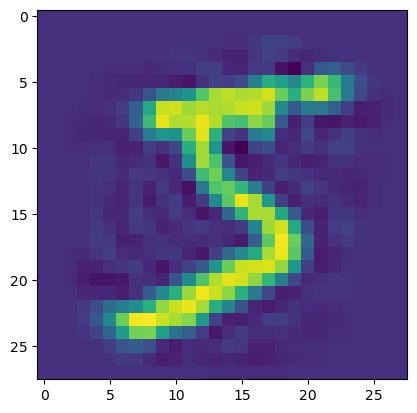

In [10]:
import matplotlib.pyplot as plt
# 154차원으로 압축
pca = PCA(n_components=154)
X_reduced = pca.fit_transform(X_train)

# 784차원으로 복원
X_recovered = pca.inverse_transform(X_reduced)
plt.imshow(X_recovered.reshape(60000,28,28)[0])
plt.show()

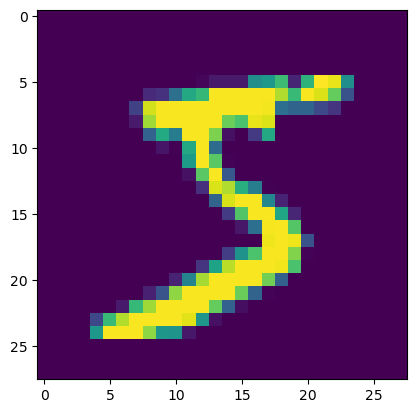

In [11]:
plt.imshow(X_train[0].reshape(28,28))

In [12]:
#점진적 PCA(Incremental PCA) 알고리즘: 대량의 데이터의 경우 메모리 부족문제를 해결
# 미니배치에 해당하는 부분만 사용해서 메모리 절약
from sklearn.decomposition import IncrementalPCA
n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_train, n_batches):
    print('.', end='')
    inc_pca.partial_fit(X_batch)
X_reduced = inc_pca.transform(X_train)
X_recovered_inc_pca = inc_pca.inverse_transform(X_reduced)

....................................................................................................

In [13]:
#일반 PCA와 점진적 PCA로 MNIST 데이터를 변환한 결과 비교
np.allclose(pca.mean_, inc_pca.mean_) # allclose: 두배열이 오차범위 내에서 같으면 True 반환

False

In [14]:
np.mean(pca.mean_), np.mean(inc_pca.mean_)

(0.13066266, 0.1306604774024101)

In [15]:
#랜덤 포레스트 모형
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=10, random_state=0)
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [16]:
#검증용 데이터 셋으로 평가
from sklearn.metrics import accuracy_score
y_pred = rnd_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9469

In [17]:
#PCA를 사용하여 분산이 95%가 되도록 차원 축소
pca = PCA(n_components=0.95)
X_train_reduced = pca.fit_transform(X_train)

In [18]:
#랜덤 포레스트 모형에 압축된 데이터 입력
rnd_clf2 = RandomForestClassifier(n_estimators=10, random_state=0)
rnd_clf2.fit(X_train_reduced, y_train)
# 학습시간이 늘어남 => 차원축소가 반드시 학습 시간 단축을 의미하지 않음

RandomForestClassifier(n_estimators=10, random_state=0)

In [19]:
#검증용 데이터 셋으로 평가
X_test_reduced = pca.transform(X_test)
y_pred = rnd_clf2.predict(X_test_reduced)
accuracy_score(y_test, y_pred)
# 일반적으로 차원 축소로 인한 정보손실로 성능 감소

0.8955

In [20]:
#로지스틱 회귀분석
from sklearn.linear_model import LogisticRegression
log_clf = LogisticRegression(multi_class='multinomial', # multinomial: 소프트맥스 방식의 로지스틱 회귀분석
                             max_iter=1000, random_state=0)
log_clf.fit(X_train, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=0)

In [21]:
y_pred = log_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9256

In [22]:
#주성분분석으로 축소된 데이터셋으로 학습
log_clf2 = LogisticRegression(multi_class='multinomial', 
                              max_iter=1000, random_state=0)
log_clf2.fit(X_train_reduced, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=0)

In [23]:
y_pred = log_clf2.predict(X_test_reduced)
accuracy_score(y_test, y_pred)
# 성능은 약간 감소하였으나 속도가 향상됨

0.9233